# Simple Text Analysis 

* Scrape a website with loads of text
* Create a word to count frequency matrix
* Show the word cloud
* Do the same for phrases: n-grams

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
# Do a GET request to a web page
response = requests.get('http://www.paulgraham.com/hamming.html')
response

<Response [200]>

In [3]:
# Create a html parser
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
# Grab the text within the first table element from the web page
text = soup.table.get_text()
text

"Talk at Bellcore, 7 March 1986The title of my talk is, ``You and Your Research.'' It is not about managing research, it is about how you individually do your research. I could give a talk on the other subject-- but it's not, it's about you. I'm not talking about ordinary run-of-the-mill research; I'm talking about great research. And for the sake of describing great research I'll occasionally say Nobel-Prize type of work. It doesn't have to gain the Nobel Prize, but I mean those kinds of things which we perceive are significant things. Relativity, if you want, Shannon's information theory, any number of outstanding theories-- that's the kind of thing I'm talking about.Now, how did I come to do this study? At Los Alamos I was brought in to run the computing machines which other people had got going, so those scientists and physicists could get back to business. I saw I was a stooge. I saw that although physically I was the same, they were different. And to put the thing bluntly, I was 

In [7]:
# Convert a collection of text documents to a matrix of token counts
vect = CountVectorizer(stop_words='english')
mat = vect.fit_transform([text])

# ngram
vect2 = CountVectorizer(stop_words='english', ngram_range=(2, 3))
mat2 = vect2.fit_transform([text])

In [8]:
# Get the counts to the first document
counts = mat.toarray()[0]
counts2 = mat2.toarray()[0]

In [9]:
# Find the index with the token 'work'
arr = np.asarray(vect.get_feature_names())
ind = np.where(arr == 'work')
counts[ind]

array([78], dtype=int64)

In [11]:
# Create feature array of (word, count)
features = list(zip(vect.get_feature_names(), counts))
features2 = list(zip(vect2.get_feature_names(), counts2))

In [12]:
import wordcloud


/usr/local/lib/python3.5/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


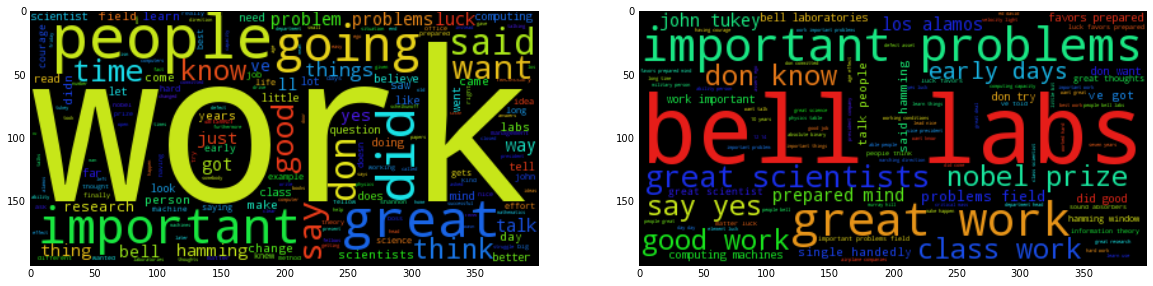

In [13]:
# Plot the word cloud
w = wordcloud.WordCloud()
img = w.generate_from_frequencies(features)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)

img2 = w.generate_from_frequencies(features2)
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.show()